### import packages

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### read csv file and create data frame 

In [6]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### pre proccess data 

In [10]:
X = np.asarray(df[['age', 'sex', 'cp', 'chol', 'fbs', 'thalachh', 'exng' ,'oldpeak' , 'slp' , 'caa' , 'thall']])
X[0:10]

array([[ 63. ,   1. ,   3. , 233. ,   1. , 150. ,   0. ,   2.3,   0. ,
          0. ,   1. ],
       [ 37. ,   1. ,   2. , 250. ,   0. , 187. ,   0. ,   3.5,   0. ,
          0. ,   2. ],
       [ 41. ,   0. ,   1. , 204. ,   0. , 172. ,   0. ,   1.4,   2. ,
          0. ,   2. ],
       [ 56. ,   1. ,   1. , 236. ,   0. , 178. ,   0. ,   0.8,   2. ,
          0. ,   2. ],
       [ 57. ,   0. ,   0. , 354. ,   0. , 163. ,   1. ,   0.6,   2. ,
          0. ,   2. ],
       [ 57. ,   1. ,   0. , 192. ,   0. , 148. ,   0. ,   0.4,   1. ,
          0. ,   1. ],
       [ 56. ,   0. ,   1. , 294. ,   0. , 153. ,   0. ,   1.3,   1. ,
          0. ,   2. ],
       [ 44. ,   1. ,   1. , 263. ,   0. , 173. ,   0. ,   0. ,   2. ,
          0. ,   3. ],
       [ 52. ,   1. ,   2. , 199. ,   1. , 162. ,   0. ,   0.5,   2. ,
          0. ,   3. ],
       [ 57. ,   1. ,   2. , 168. ,   0. , 174. ,   0. ,   1.6,   2. ,
          0. ,   2. ]])

In [11]:
y = np.asarray(df['output'])
y [0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### normilize data

In [12]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292, -0.25633371,  2.394438  ,
         0.01544279, -0.69663055,  1.08733806, -2.27457861, -0.71442887,
        -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707,  0.07219949, -0.41763453,
         1.63347147, -0.69663055,  2.12257273, -2.27457861, -0.71442887,
        -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.81677269, -0.41763453,
         0.97751389, -0.69663055,  0.31091206,  0.97635214, -0.71442887,
        -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.19835726, -0.41763453,
         1.23989692, -0.69663055, -0.20670527,  0.97635214, -0.71442887,
        -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463,  2.08204965, -0.41763453,
         0.58393935,  1.43548113, -0.37924438,  0.97635214, -0.71442887,
        -0.51292188]])

### train / test splite data frame

In [14]:
from sklearn.model_selection import train_test_split

# i want to train size be 0.7
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

print ('Train data is ', X_train.shape,  y_train.shape)

print ('Test data is ', X_test.shape,  y_test.shape)

Train data is  (212, 11) (212,)
Test data is  (91, 11) (91,)


### modeling with logistic regression 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

### predict test data

In [18]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1])

### predict_proba
<br/>
the first column is the probability of class 0
and second column is probability of class 1

In [24]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.39947297, 0.60052703],
       [0.71951037, 0.28048963],
       [0.37262457, 0.62737543],
       [0.21078138, 0.78921862],
       [0.45518598, 0.54481402]])

### Evaluation our model

#### jaccard index


In [25]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.5555555555555556

#### confusion matrix

Confusion matrix, without normalization
[[46  7]
 [13 25]]


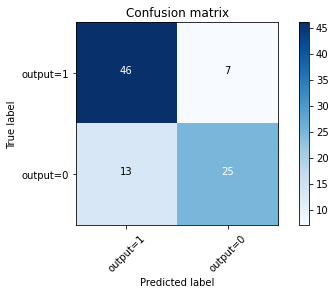

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')


In [36]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        38
           1       0.78      0.87      0.82        53

    accuracy                           0.78        91
   macro avg       0.78      0.76      0.77        91
weighted avg       0.78      0.78      0.78        91



### logloss

In [37]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4964908003050577